[6.8652256317216445, 9.323082693861556, -15.724335638286357, 18.76600301385749, -13.60171853197881, -10.14079149049486, 17.3874586782746, 3.6041170470313166, 13.237512859941436, 5.441434953634179, -17.067217482488285, 3.927919637800955, -7.96520336550991, 11.96335662753025, 0.05713721787560003, 15.89146998242622, -4.005806356455627, 16.671667128578022, 17.552801950277942, 12.263826491964206, -17.738643859732434, 19.51300217973932, 13.674640739010062, 2.14974849616171, -2.0731486362221907, -2.7475052811053597, -1.2313301007879303, -12.969159822411669, 8.96513328456454, -5.922997539990895, 6.543724439102276, 1.4395109379500894, -18.784848079106798, -7.189743001156627, 7.977091178466025, -12.239235090470807, -15.781883062477005, -12.035842131028081, -9.529574679562145, -6.313453469580242] [-10.04216489  -3.15675544  -3.1203372   -1.69369493  -1.6091612
  -0.51198968  -0.35033639   0.42881231   0.56466572   1.17111533
   2.01065221   2.12813655   2.37828773   2.92216522   3.13341862
   3.9

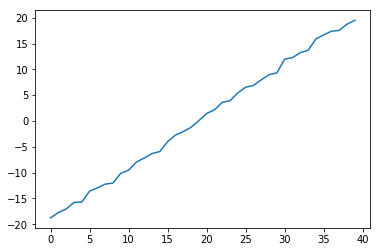

In [98]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.tight_layout()
import time

class site:
    def __init__(self, position, properties):
        self.index = position
        for name,value in properties.items():
            setattr(self, name, value)
        

class AndersonHopp:
    def __init__(self, size, tee, Uave, Ustdev):
        self.Uave = Uave
        self.Ustdev = Ustdev
        self.L = int(size)
        self.system = []
        self.spectrum = []
        self.eigen = []
        self.x = []
        for i in range(L):
            self.x.append(np.exp(i * 1j * math.pi * 2 / self.L))
        self.x = np.diag(self.x)
        self.H = np.zeros((self.L,self.L)) + t*(np.diag(np.ones(self.L-1),1) + np.diag(np.ones(self.L-1),-1))
        for i in range(self.L):
            self.system.append(site(i, {'t':tee, 'U':np.random.normal(Uave,Ustdev)}))
            self.H[i,i] = self.system[i].U
        self.solve()
        
        
        
    def solve(self):
        temp = np.linalg.eigh(self.H)
        self.spectrum = temp[0]
        self.eigen = temp[1]
#        for wave in self.eigen:
 #           out, sub = plt.subplots(1)
  #          sub.plot(wave)
    
    def reparam(self, UaveNew, UstdevNew):
        self.Uave = UaveNew
        self.Ustdev = UstdevNew
        self.rescramble()
    
    def rescramble(self, UaveSingle = None, UstdevSingle = None):
        if Unew == None:
            UaveSingle = self.Uave
            UstdevSingle = self.Ustdev
        for i in range(self.L):
            self.system[i].U = np.random.normal(UaveSingle,UstdevSingle)
            self.H[i,i] = self.system[i].U
        self.solve()
    
    def CoM(self, index=-.5):
        out = []
        if not(index+.5):
            for i in range(self.L):
                out.append(self.L/(2*math.pi) * np.imag(np.log(np.vdot(self.eigen[i], np.dot(self.x, self.eigen[i])))))
        else:
            if abs(index + .5)<self.L:
                return (self.L/(2*math.pi) * np.imag(np.log(np.vdot(self.eigen[index], np.dot(self.x, self.eigen[index])))))
            else:
                print("CoM passed bad index")
        return out
    
    def locLength(self, index=-.5):
        out = []
        if not(index+.5):
            for i in range(self.L):
                return #tnoheunthoe
        else:
            if abs(index + .5)<self.L:
                return ####tnhnh
            else:
                print("locLength passed bad index")
        return out
    
#    def WFout(self):
 #       vector = []
  #      for site in self.system:
   #         vector.append(site.wf)
    #    return vector
    
    def E(self):
        E=0
        for i in range(int(-self.L/2),int(self.L/2)):
            E+=self.system[i].wf*self.Hi(i)
        return E
    
    def Hi(self, i):
        return (t*(self.system[i-1].wf + self.system[i+1].wf) + self.system[i].U * self.system[i].wf)
    
#    def timeEvolve(self, dt):
#        wfnext = [0]*L
 #       for i in range(int(-L/2),int(L/2)):
  #          wfnext[i] = exp(j*dt*Hi(i))


L = 40
t = 1
Uave = 5
Ustdev = 5

gaussian = AndersonHopp(L, t, Uave, Ustdev)

#print(gaussian.eigen[4])
print(gaussian.CoM(),gaussian.spectrum)
out, sub = plt.subplots(1)
sub.plot(np.sort(gaussian.CoM()))

#for sites in test.system:
#    print(sites.t)
#    print(sites.U)
